In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score as auc

In [3]:
test_data = pd.read_csv('./b/test_data_.csv')
train_data_ = pd.read_csv('./b/train_data_.csv')

## 对数值部分进行归一化/正态分布

In [12]:
test_data.job_year.describe()

count    4000.000000
mean        2.843250
std         5.226663
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        40.000000
Name: job_year, dtype: float64

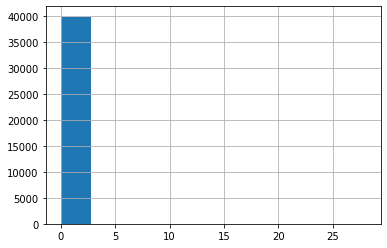

In [18]:
train_data_.ovd_30d_loan_tot_cnt.hist()

## 对trd表和beh表进一步挖掘

In [19]:
data_train_trd = pd.read_csv('./训练数据集1/训练数据集_trd.csv')
data_train_beh = pd.read_csv('./训练数据集1/训练数据集_beh.csv')
test_trd = pd.read_csv('./b/评分数据集_trd_b.csv')
test_beh = pd.read_csv('./b/评分数据集_beh_b.csv')

In [20]:
data_train_trd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367211 entries, 0 to 1367210
Data columns (total 8 columns):
id             1367211 non-null object
flag           1367211 non-null int64
Dat_Flg1_Cd    1367211 non-null object
Dat_Flg3_Cd    1367211 non-null object
Trx_Cod1_Cd    1367211 non-null int64
Trx_Cod2_Cd    1367211 non-null int64
trx_tm         1367211 non-null object
cny_trx_amt    1367211 non-null float64
dtypes: float64(1), int64(3), object(4)
memory usage: 83.4+ MB


In [21]:
data_train_trd.head()

,id,flag,Dat_Flg1_Cd,Dat_Flg3_Cd,Trx_Cod1_Cd,Trx_Cod2_Cd,trx_tm,cny_trx_amt
0,UFDC88A,0,B,B,1,116,2019-06-20 07:15:28,-127.99
1,UFDC88A,0,B,B,1,116,2019-06-16 10:09:13,-55.88
2,UFDC88A,0,B,B,1,136,2019-05-14 16:11:32,-557.00
3,UFDC88A,0,B,B,1,136,2019-05-19 21:54:40,-77.80
4,UFDC88A,0,B,B,1,113,2019-06-18 08:23:59,-271.62


### 支付方式Dat_Flg3_Cd

In [35]:
data_train_trd.Dat_Flg3_Cd.value_counts()

A    695630
B    661136
C     10445
Name: Dat_Flg3_Cd, dtype: int64

In [23]:

output_dict = {}
with open('./训练数据集1/训练数据集_trd.csv') as f:
    for line_num, line in enumerate(f):
        if line_num >0:
            user = line.split(',')[0]
            pay_way = line.split(',')[3]
            Flg3_A = 0
            if user in output_dict:
                Flg3_A += output_dict[user]
                if pay_way == 'A':
                    Flg3_A += 1
                    output_dict.update({user:Flg3_A}) # update当前指标加上原指标
                    continue
            else:
                if pay_way == 'A':
                    Flg3_A = 1
                output_dict.update({user:Flg3_A})
output_list = [{'user':k, 'Flg3_A':v} for k, v in output_dict.items()]
Flg3_A_df = pd.DataFrame(output_list)

In [26]:
Flg3_A_df.Flg3_A.value_counts()

0      16874
1       2516
2        812
3        753
5        628
       ...  
470        1
422        1
406        1
374        1
519        1
Name: Flg3_A, Length: 478, dtype: int64

In [27]:
output_dict = {}
with open('./训练数据集1/训练数据集_trd.csv') as f:
    for line_num, line in enumerate(f):
        if line_num >0:
            user = line.split(',')[0]
            pay_way = line.split(',')[3]
            Flg3_B = 0
            if user in output_dict:
                Flg3_B += output_dict[user]
                if pay_way == 'B':
                    Flg3_B += 1
                    output_dict.update({user:Flg3_B}) # update当前指标加上原指标
                    continue
            else:
                if pay_way == 'B':
                    Flg3_B = 1
                output_dict.update({user:Flg3_B})
output_list = [{'user':k, 'Flg3_B':v} for k, v in output_dict.items()]
Flg3_B_df = pd.DataFrame(output_list)

In [29]:
Flg3_B_df.Flg3_B.value_counts()

0      4481
2      2254
4      1856
1      1759
6      1471
       ... 
351       1
274       1
290       1
306       1
383       1
Name: Flg3_B, Length: 325, dtype: int64

In [30]:
output_dict = {}
with open('./训练数据集1/训练数据集_trd.csv') as f:
    for line_num, line in enumerate(f):
        if line_num >0:
            user = line.split(',')[0]
            pay_way = line.split(',')[3]
            Flg3_C = 0
            if user in output_dict:
                Flg3_C += output_dict[user]
                if pay_way == 'C':
                    Flg3_C += 1
                    output_dict.update({user:Flg3_C}) # update当前指标加上原指标
                    continue
            else:
                if pay_way == 'C':
                    Flg3_C = 1
                output_dict.update({user:Flg3_C})
output_list = [{'user':k, 'Flg3_C':v} for k, v in output_dict.items()]
Flg3_C_df = pd.DataFrame(output_list)

In [32]:
Flg3_C_df.Flg3_C.value_counts()

0      29624
1        856
2        530
3        248
4        175
5        104
6         91
7         56
8         48
10        32
9         32
11        19
14        18
12        18
13        17
16        13
15        10
19         8
17         8
20         7
23         7
27         6
18         6
24         5
29         4
26         4
35         3
31         3
21         3
33         3
25         2
37         2
58         2
36         2
124        2
22         2
38         2
32         2
61         2
41         2
40         2
44         2
34         1
63         1
99         1
53         1
54         1
72         1
42         1
77         1
125        1
46         1
39         1
Name: Flg3_C, dtype: int64

In [33]:
train_trd_Flg3 = pd.merge(Flg3_A_df, Flg3_B_df, how='left', left_on='user', right_on='user')
train_trd_Flg3

,user,Flg3_A,Flg3_B
0,UFDC88A,35,77
1,UD12259,0,28
2,UE909CB,12,54
3,UC9839D,1,12
4,U7F38DE,0,26
...,...,...,...
31988,U3F0CCB,0,21
31989,UF4B882,0,25
31990,U77434C,0,21
31991,U062E5A,1,0


In [34]:
train_trd_Flg3 = pd.merge(train_trd_Flg3, Flg3_C_df, how='left', left_on='user', right_on='user')
train_trd_Flg3

,user,Flg3_A,Flg3_B,Flg3_C
0,UFDC88A,35,77,0
1,UD12259,0,28,0
2,UE909CB,12,54,0
3,UC9839D,1,12,0
4,U7F38DE,0,26,0
...,...,...,...,...
31988,U3F0CCB,0,21,0
31989,UF4B882,0,25,0
31990,U77434C,0,21,0
31991,U062E5A,1,0,0


In [97]:
# 测试集

output_dict = {}
with open('./b/评分数据集_trd_b.csv') as f:
    for line_num, line in enumerate(f):
        if line_num >0:
            user = line.split(',')[0]
            pay_way = line.split(',')[2]
            Flg3_A = 0
            if user in output_dict:
                Flg3_A += output_dict[user]
                if pay_way == 'A':
                    Flg3_A += 1
                    output_dict.update({user:Flg3_A}) # update当前指标加上原指标
                    continue
            else:
                if pay_way == 'A':
                    Flg3_A = 1
                output_dict.update({user:Flg3_A})
output_list = [{'user':k, 'Flg3_A':v} for k, v in output_dict.items()]
test_Flg3_A_df = pd.DataFrame(output_list)

In [98]:
output_dict = {}
with open('./b/评分数据集_trd_b.csv') as f:
    for line_num, line in enumerate(f):
        if line_num >0:
            user = line.split(',')[0]
            pay_way = line.split(',')[2]
            Flg3_B = 0
            if user in output_dict:
                Flg3_B += output_dict[user]
                if pay_way == 'B':
                    Flg3_B += 1
                    output_dict.update({user:Flg3_B}) # update当前指标加上原指标
                    continue
            else:
                if pay_way == 'B':
                    Flg3_B = 1
                output_dict.update({user:Flg3_B})
output_list = [{'user':k, 'Flg3_B':v} for k, v in output_dict.items()]
test_Flg3_B_df = pd.DataFrame(output_list)

In [99]:
output_dict = {}
with open('./b/评分数据集_trd_b.csv') as f:
    for line_num, line in enumerate(f):
        if line_num >0:
            user = line.split(',')[0]
            pay_way = line.split(',')[2]
            Flg3_C = 0
            if user in output_dict:
                Flg3_C += output_dict[user]
                if pay_way == 'C':
                    Flg3_C += 1
                    output_dict.update({user:Flg3_C}) # update当前指标加上原指标
                    continue
            else:
                if pay_way == 'C':
                    Flg3_C = 1
                output_dict.update({user:Flg3_C})
output_list = [{'user':k, 'Flg3_C':v} for k, v in output_dict.items()]
test_Flg3_C_df = pd.DataFrame(output_list)

In [100]:
test_trd_Flg3 = pd.merge(test_Flg3_A_df, test_Flg3_B_df, how='left', left_on='user', right_on='user')
test_trd_Flg3 = pd.merge(test_trd_Flg3, test_Flg3_C_df, how='left', left_on='user', right_on='user')
test_trd_Flg3

,user,Flg3_A,Flg3_B,Flg3_C
0,U452CA2,3,9,0
1,U4F2786,21,7,0
2,U10C98F,0,29,0
3,U2ECCA9,2,8,0
4,U02331D,0,46,0
...,...,...,...,...
3185,U34C6FC,0,66,0
3186,U3E12F8,0,6,0
3187,U506180,94,0,0
3188,U1DA165,0,15,0


In [101]:
test_trd_Flg3.Flg3_C.value_counts()

0     2981
1       85
2       31
3       21
4       21
5        7
9        5
7        5
6        5
8        5
12       4
10       3
11       2
38       2
18       1
14       1
16       1
79       1
20       1
22       1
24       1
21       1
32       1
13       1
17       1
19       1
28       1
Name: Flg3_C, dtype: int64

## trd表的收支一级分类Trx_Cod1_Cd


In [40]:
data_train_trd.Trx_Cod1_Cd.value_counts()

1    956662
3    239078
2    171471
Name: Trx_Cod1_Cd, dtype: int64

In [65]:
l1 = sorted(data_train_trd.Trx_Cod2_Cd.value_counts().index)

In [62]:
l2 = sorted(test_trd.Trx_Cod2_Cd.value_counts().index)

In [69]:
l1

[101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 122,
 123,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 211,
 212,
 213,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311]

In [70]:
l2

[101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 201,
 202,
 203,
 204,
 205,
 206,
 207,
 208,
 209,
 210,
 212,
 213,
 301,
 302,
 303,
 304,
 305,
 306,
 307,
 308,
 309,
 310,
 311]

In [71]:
data_train_trd.Trx_Cod1_Cd[0]

1

In [73]:
data_train_trd.head()

,id,flag,Dat_Flg1_Cd,Dat_Flg3_Cd,Trx_Cod1_Cd,Trx_Cod2_Cd,trx_tm,cny_trx_amt
0,UFDC88A,0,B,B,1,116,2019-06-20 07:15:28,-127.99
1,UFDC88A,0,B,B,1,116,2019-06-16 10:09:13,-55.88
2,UFDC88A,0,B,B,1,136,2019-05-14 16:11:32,-557.00
3,UFDC88A,0,B,B,1,136,2019-05-19 21:54:40,-77.80
4,UFDC88A,0,B,B,1,113,2019-06-18 08:23:59,-271.62


In [85]:
f = open('./训练数据集1/训练数据集_trd.csv')
f.readlines()

['id,flag,Dat_Flg1_Cd,Dat_Flg3_Cd,Trx_Cod1_Cd,Trx_Cod2_Cd,trx_tm,cny_trx_amt\n',
 'UFDC88A,0,B,B,01,0116,2019-06-20 07:15:28,-127.99\n',
 'UFDC88A,0,B,B,01,0116,2019-06-16 10:09:13,-55.88\n',
 'UFDC88A,0,B,B,01,0136,2019-05-14 16:11:32,-557\n',
 'UFDC88A,0,B,B,01,0136,2019-05-19 21:54:40,-77.8\n',
 'UFDC88A,0,B,B,01,0113,2019-06-18 08:23:59,-271.62\n',
 'UFDC88A,0,B,B,01,0136,2019-06-06 13:21:37,-768\n',
 'UFDC88A,0,B,B,01,0136,2019-06-17 00:25:41,-206\n',
 'UFDC88A,0,B,B,01,0101,2019-06-17 00:06:50,-356\n',
 'UFDC88A,0,B,B,01,0104,2019-06-24 08:46:22,-200\n',
 'UFDC88A,0,B,B,01,0104,2019-05-20 13:50:34,-580\n',
 'UFDC88A,0,B,B,01,0136,2019-06-13 18:58:37,-508.28\n',
 'UFDC88A,0,B,B,01,0136,2019-06-17 10:55:23,-309\n',
 'UFDC88A,0,B,B,01,0136,2019-06-11 22:26:18,-134.8\n',
 'UFDC88A,0,B,B,01,0116,2019-06-01 08:46:04,-1438\n',
 'UFDC88A,0,B,B,01,0116,2019-06-16 10:18:09,-65.7\n',
 'UFDC88A,0,B,B,01,0116,2019-06-09 14:12:48,-108.98\n',
 'UFDC88A,0,B,B,01,0136,2019-06-13 16:19:49,-272\n',

In [83]:

output_dict = {}
with open('./训练数据集1/训练数据集_trd.csv') as f:
    for line_num, line in enumerate(f):
        if line_num >0:
            user = line.split(',')[0]
            pay_way = line.split(',')[4]
            Trx1_1 = 0
            if user in output_dict:
                Trx1_1 += output_dict[user]
                if pay_way == '01':
                    Trx1_1 += 1
                    output_dict.update({user:Trx1_1}) # update当前指标加上原指标
                    continue
            else:
                if pay_way == '01':
                    Trx1_1 = 1
                output_dict.update({user:Trx1_1})
output_list = [{'user':k, 'Trx1_1':v} for k, v in output_dict.items()]
Trx1_1_df = pd.DataFrame(output_list)

In [84]:
Trx1_1_df

,user,Trx1_1
0,UFDC88A,83
1,UD12259,18
2,UE909CB,50
3,UC9839D,9
4,U7F38DE,10
...,...,...
31988,U3F0CCB,19
31989,UF4B882,9
31990,U77434C,12
31991,U062E5A,0


In [86]:

output_dict = {}
with open('./训练数据集1/训练数据集_trd.csv') as f:
    for line_num, line in enumerate(f):
        if line_num >0:
            user = line.split(',')[0]
            pay_way = line.split(',')[4]
            Trx1_2 = 0
            if user in output_dict:
                Trx1_2 += output_dict[user]
                if pay_way == '02':
                    Trx1_2 += 1
                    output_dict.update({user:Trx1_2}) # update当前指标加上原指标
                    continue
            else:
                if pay_way == '02':
                    Trx1_2 = 1
                output_dict.update({user:Trx1_2})
output_list = [{'user':k, 'Trx1_2':v} for k, v in output_dict.items()]
Trx1_2_df = pd.DataFrame(output_list)

In [87]:

output_dict = {}
with open('./训练数据集1/训练数据集_trd.csv') as f:
    for line_num, line in enumerate(f):
        if line_num >0:
            user = line.split(',')[0]
            pay_way = line.split(',')[4]
            Trx1_3 = 0
            if user in output_dict:
                Trx1_3 += output_dict[user]
                if pay_way == '03':
                    Trx1_3 += 1
                    output_dict.update({user:Trx1_3}) # update当前指标加上原指标
                    continue
            else:
                if pay_way == '03':
                    Trx1_3 = 1
                output_dict.update({user:Trx1_3})
output_list = [{'user':k, 'Trx1_3':v} for k, v in output_dict.items()]
Trx1_3_df = pd.DataFrame(output_list)

In [88]:
train_trd_Trx1 = pd.merge(Trx1_1_df, Trx1_2_df, how='left', left_on='user', right_on='user')
train_trd_Trx1 = pd.merge(train_trd_Trx1, Trx1_3_df, how='left', left_on='user', right_on='user')
train_trd_Trx1

,user,Trx1_1,Trx1_2,Trx1_3
0,UFDC88A,83,20,9
1,UD12259,18,0,10
2,UE909CB,50,9,7
3,UC9839D,9,1,3
4,U7F38DE,10,5,11
...,...,...,...,...
31988,U3F0CCB,19,1,1
31989,UF4B882,9,0,16
31990,U77434C,12,0,9
31991,U062E5A,0,1,0


In [95]:
test_trd.Trx_Cod1_Cd.value_counts()

1    99857
3    25121
2    17667
Name: Trx_Cod1_Cd, dtype: int64

In [96]:
f = open('./b/评分数据集_trd_b.csv')
f.readlines()

['id,Dat_Flg1_Cd,Dat_Flg3_Cd,Trx_Cod1_Cd,Trx_Cod2_Cd,trx_tm,cny_trx_amt\n',
 'U452CA2,B,B,01,0130,2019-06-01 00:29:32,-5\n',
 'U452CA2,B,B,01,0136,2019-05-15 00:00:00,-37.19\n',
 'U452CA2,C,B,03,0309,2019-05-30 13:22:08,249.47\n',
 'U452CA2,B,B,01,0108,2019-05-30 14:37:13,-29.94\n',
 'U452CA2,B,B,01,0136,2019-06-21 00:00:00,-111.31\n',
 'U452CA2,B,B,01,0136,2019-05-14 00:00:00,-177.34\n',
 'U452CA2,B,B,01,0136,2019-06-30 04:41:05,-598\n',
 'U452CA2,B,B,01,0130,2019-05-01 00:26:31,-5\n',
 'U452CA2,C,B,03,0309,2019-06-27 11:58:24,34.94\n',
 'U4F2786,C,A,02,0213,2019-06-18 17:07:11,13022.71\n',
 'U4F2786,B,A,03,0308,2019-06-15 21:21:04,-1\n',
 'U4F2786,C,A,03,0308,2019-06-24 13:25:37,30\n',
 'U4F2786,C,A,02,0204,2019-06-21 02:46:39,0.37\n',
 'U4F2786,C,A,02,0213,2019-06-13 09:38:01,4958.57\n',
 'U4F2786,C,A,02,0213,2019-06-26 15:01:33,3727.87\n',
 'U4F2786,B,A,03,0308,2019-06-15 21:15:54,-1240\n',
 'U4F2786,B,A,01,0134,2019-06-14 02:46:48,-0.86\n',
 'U4F2786,B,A,03,0308,2019-05-15 10:28:2

In [102]:
output_dict = {}
with open('./b/评分数据集_trd_b.csv') as f:
    for line_num, line in enumerate(f):
        if line_num >0:
            user = line.split(',')[0]
            pay_way = line.split(',')[3]
            Trx1_1 = 0
            if user in output_dict:
                Trx1_1 += output_dict[user]
                if pay_way == '01':
                    Trx1_1 += 1
                    output_dict.update({user:Trx1_1}) # update当前指标加上原指标
                    continue
            else:
                if pay_way == '01':
                    Trx1_1 = 1
                output_dict.update({user:Trx1_1})
output_list = [{'user':k, 'Trx1_1':v} for k, v in output_dict.items()]
test_Trx1_1_df = pd.DataFrame(output_list)

In [103]:

output_dict = {}
with open('./b/评分数据集_trd_b.csv') as f:
    for line_num, line in enumerate(f):
        if line_num >0:
            user = line.split(',')[0]
            pay_way = line.split(',')[3]
            Trx1_2 = 0
            if user in output_dict:
                Trx1_2 += output_dict[user]
                if pay_way == '02':
                    Trx1_2 += 1
                    output_dict.update({user:Trx1_2}) # update当前指标加上原指标
                    continue
            else:
                if pay_way == '02':
                    Trx1_2 = 1
                output_dict.update({user:Trx1_2})
output_list = [{'user':k, 'Trx1_2':v} for k, v in output_dict.items()]
test_Trx1_2_df = pd.DataFrame(output_list)

In [104]:

output_dict = {}
with open('./b/评分数据集_trd_b.csv') as f:
    for line_num, line in enumerate(f):
        if line_num >0:
            user = line.split(',')[0]
            pay_way = line.split(',')[3]
            Trx1_3 = 0
            if user in output_dict:
                Trx1_3 += output_dict[user]
                if pay_way == '03':
                    Trx1_3 += 1
                    output_dict.update({user:Trx1_3}) # update当前指标加上原指标
                    continue
            else:
                if pay_way == '03':
                    Trx1_3 = 1
                output_dict.update({user:Trx1_3})
output_list = [{'user':k, 'Trx1_3':v} for k, v in output_dict.items()]
test_Trx1_3_df = pd.DataFrame(output_list)

In [106]:
del(test_trd_Trx1)

In [107]:
test_trd_Trx1 = pd.merge(test_Trx1_1_df, test_Trx1_2_df, how='left', left_on='user', right_on='user')
test_trd_Trx1 = pd.merge(test_trd_Trx1, test_Trx1_3_df, how='left', left_on='user', right_on='user')
test_trd_Trx1

,user,Trx1_1,Trx1_2,Trx1_3
0,U452CA2,7,1,4
1,U4F2786,10,7,11
2,U10C98F,17,1,11
3,U2ECCA9,5,0,5
4,U02331D,33,1,12
...,...,...,...,...
3185,U34C6FC,58,5,3
3186,U3E12F8,4,0,2
3187,U506180,88,6,0
3188,U1DA165,9,0,6


In [109]:
test_trd_Flg3

,user,Flg3_A,Flg3_B,Flg3_C
0,U452CA2,3,9,0
1,U4F2786,21,7,0
2,U10C98F,0,29,0
3,U2ECCA9,2,8,0
4,U02331D,0,46,0
...,...,...,...,...
3185,U34C6FC,0,66,0
3186,U3E12F8,0,6,0
3187,U506180,94,0,0
3188,U1DA165,0,15,0


## beh表特征挖掘


In [134]:
data_train_beh.loc[data_train_beh.flag==0].page_no.value_counts()

CQA    287223
CQE    129624
AAO    115519
TRN     55804
XAI     45710
MSG     38577
FTR     29133
SZA     14851
BWA      9848
CTR      8156
XAG      8008
CQD      7918
SZD      7128
CQC      6236
EGA      4986
GBA      4908
CQB      4555
LC0      3443
BWE      3320
JF2      1570
JJK      1316
EGB      1076
MTA       953
FLS       851
LCT       827
FDA       784
SYK       641
JJD       353
ZY1       272
Name: page_no, dtype: int64

In [131]:
l = pd.DataFrame(data_train_beh.loc[data_train_beh.flag==1].page_no.value_counts())

In [132]:
l.page_no*17/3

CQA    284336.333333
CQE    122592.666667
AAO    114716.000000
TRN     66118.666667
XAI     45152.000000
MSG     40182.333333
FTR     37995.000000
SZA     14353.666667
BWA      9820.333333
CTR      9083.666667
XAG      8188.333333
EGA      7327.000000
SZD      6839.666667
CQD      6006.666667
GBA      4635.333333
CQC      4567.333333
BWE      3349.000000
CQB      3184.666667
LC0      2873.000000
EGB      1558.333333
JF2      1071.000000
FLS       844.333333
MTA       527.000000
LCT       498.666667
JJK       481.666667
FDA       402.333333
SYK       204.000000
ZY1       192.666667
JJD       153.000000
Name: page_no, dtype: float64

In [133]:
test_beh.page_no.value_counts()

CQA    34735
CQE    14694
AAO    14645
TRN     7278
XAI     5253
MSG     4470
FTR     3698
SZA     1703
CTR     1236
BWA     1139
CQD      899
XAG      856
SZD      832
CQC      680
EGA      670
GBA      611
CQB      525
BWE      414
LC0      398
JF2      233
MTA      158
EGB      141
LCT       91
FLS       81
FDA       74
JJK       67
SYK       37
JJD       30
ZY1       21
Name: page_no, dtype: int64

In [119]:
len(data_train_beh.loc[data_train_beh.flag==1])/len(data_train_beh)

0.15058836625344382

In [115]:
data_train_beh.head()

,id,flag,page_no,Unnamed: 3,page_tm
0,U64F0C9,0,SZA,2019-06-30 12:44:27,NaN
1,U64F0C9,0,CQE,2019-06-25 16:15:11,NaN
2,U64F0C9,0,AAO,2019-06-30 12:44:17,NaN
3,U64F0C9,0,CQE,2019-06-17 13:50:12,NaN
4,U64F0C9,0,AAO,2019-06-17 13:50:08,NaN


In [135]:
pg_no = ['TRN', 'EGA', 'CQC', 'MTA', 'SYK', 'JJD', 'JJK']

In [136]:
data_train_beh.head()

,id,flag,page_no,Unnamed: 3,page_tm
0,U64F0C9,0,SZA,2019-06-30 12:44:27,NaN
1,U64F0C9,0,CQE,2019-06-25 16:15:11,NaN
2,U64F0C9,0,AAO,2019-06-30 12:44:17,NaN
3,U64F0C9,0,CQE,2019-06-17 13:50:12,NaN
4,U64F0C9,0,AAO,2019-06-17 13:50:08,NaN


In [153]:
def beh_pg_train(code):
    output_dict = {}
    with open('./训练数据集1/训练数据集_beh.csv') as f:
        for line_num, line in enumerate(f):
            if line_num >0:
                user = line.split(',')[0]
                pay_way = line.split(',')[2]
                Trx1_1 = 0
                if user in output_dict:
                    Trx1_1 += output_dict[user]
                    if pay_way == code:
                        Trx1_1 += 1
                        output_dict.update({user:Trx1_1}) # update当前指标加上原指标
                        continue
                else:
                    if pay_way == code:
                        Trx1_1 = 1
                    output_dict.update({user:Trx1_1})
    output_list = [{'user':k, code:v} for k, v in output_dict.items()]
    Trx1_1_df = pd.DataFrame(output_list)
    return Trx1_1_df

In [154]:
x1 = beh_pg_train('TRN')

In [156]:
len(x1)

11913

In [157]:
len(data_train_beh.id.value_counts())

11913

In [158]:
train_pg_no = x1

In [159]:
train_pg_no

,user,TRN
0,U64F0C9,0
1,UA262F2,0
2,U7EDD34,0
3,UFF6271,0
4,U29A12A,0
...,...,...
11908,U95853D,0
11909,U1CF570,0
11910,UFED024,0
11911,U99B403,15


In [160]:
for code in pg_no[1:]:
    cur = beh_pg_train(code)
    train_pg_no = pd.merge(train_pg_no, cur, how='left', left_on='user', right_on='user')

In [162]:
x = beh_pg_train('EGA')

In [163]:
x

,user,EGA
0,U64F0C9,0
1,UA262F2,0
2,U7EDD34,0
3,UFF6271,0
4,U29A12A,0
...,...,...
11908,U95853D,0
11909,U1CF570,0
11910,UFED024,0
11911,U99B403,12


In [161]:
train_pg_no

,user,TRN,EGA,CQC,MTA,SYK,JJD,JJK
0,U64F0C9,0,0,0,0,0,0,0
1,UA262F2,0,0,0,0,0,0,0
2,U7EDD34,0,0,0,0,0,0,0
3,UFF6271,0,0,0,0,0,0,0
4,U29A12A,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
11908,U95853D,0,0,0,0,0,0,0
11909,U1CF570,0,0,0,0,0,0,0
11910,UFED024,0,0,0,0,0,0,0
11911,U99B403,15,12,3,0,0,0,0


In [167]:
data_train_beh.loc[data_train_beh.id=='U64F0C9']

,id,flag,page_no,Unnamed: 3,page_tm
0,U64F0C9,0,SZA,2019-06-30 12:44:27,NaN
1,U64F0C9,0,CQE,2019-06-25 16:15:11,NaN
2,U64F0C9,0,AAO,2019-06-30 12:44:17,NaN
3,U64F0C9,0,CQE,2019-06-17 13:50:12,NaN
4,U64F0C9,0,AAO,2019-06-17 13:50:08,NaN
5,U64F0C9,0,CQE,2019-06-17 13:50:02,NaN
6,U64F0C9,0,CQA,2019-06-17 13:51:13,NaN
7,U64F0C9,0,CQE,2019-06-30 12:44:24,NaN
8,U64F0C9,0,AAO,2019-06-30 12:44:17,NaN
9,U64F0C9,0,AAO,2019-06-30 12:44:17,NaN


In [145]:
f = open('./训练数据集1/训练数据集_beh.csv')
f.readlines()

['id,flag,page_no,,page_tm\n',
 'U64F0C9,0,SZA,2019-06-30 12:44:27\n',
 'U64F0C9,0,CQE,2019-06-25 16:15:11\n',
 'U64F0C9,0,AAO,2019-06-30 12:44:17\n',
 'U64F0C9,0,CQE,2019-06-17 13:50:12\n',
 'U64F0C9,0,AAO,2019-06-17 13:50:08\n',
 'U64F0C9,0,CQE,2019-06-17 13:50:02\n',
 'U64F0C9,0,CQA,2019-06-17 13:51:13\n',
 'U64F0C9,0,CQE,2019-06-30 12:44:24\n',
 'U64F0C9,0,AAO,2019-06-30 12:44:17\n',
 'U64F0C9,0,AAO,2019-06-30 12:44:17\n',
 'U64F0C9,0,SZA,2019-06-17 13:50:16\n',
 'U64F0C9,0,CQA,2019-06-25 16:15:07\n',
 'U64F0C9,0,AAO,2019-06-17 13:50:08\n',
 'U64F0C9,0,CQE,2019-06-30 12:44:12\n',
 'U64F0C9,0,CQA,2019-06-17 13:49:54\n',
 'U64F0C9,0,CQE,2019-06-25 16:15:28\n',
 'U64F0C9,0,AAO,2019-06-30 12:44:16\n',
 'U64F0C9,0,CQE,2019-06-25 16:15:32\n',
 'U64F0C9,0,CQA,2019-06-30 12:44:06\n',
 'UA262F2,1,CQA,2019-06-29 00:00:33\n',
 'UA262F2,1,CQA,2019-06-30 09:12:27\n',
 'U7EDD34,0,XAG,2019-06-28 22:51:04\n',
 'U7EDD34,0,XAI,2019-06-11 18:35:34\n',
 'U7EDD34,0,XAI,2019-06-28 22:51:03\n',
 'U7EDD34

In [175]:
def beh_pg_test(code):
    output_dict = {}
    with open('./b/评分数据集_beh_b.csv') as f:
        for line_num, line in enumerate(f):
            if line_num >0:
                user = line.split(',')[0]
                pay_way = line.split(',')[1]
                Trx1_1 = 0
                if user in output_dict:
                    Trx1_1 += output_dict[user]
                    if pay_way == code:
                        Trx1_1 += 1
                        output_dict.update({user:Trx1_1}) # update当前指标加上原指标
                        continue
                else:
                    if pay_way == code:
                        Trx1_1 = 1
                    output_dict.update({user:Trx1_1})
    output_list = [{'user':k, code:v} for k, v in output_dict.items()]
    Trx1_1_df = pd.DataFrame(output_list)
    return Trx1_1_df

In [176]:
x1 = beh_pg_test('TRN')

In [177]:
(x1.TRN!=0).sum()

515

In [178]:
test_pg_no = x1

In [179]:
for code in pg_no[1:]:
    cur = beh_pg_test(code)
    test_pg_no = pd.merge(test_pg_no, cur, how='left', left_on='user', right_on='user')

In [186]:
test_pg_no

,user,TRN,EGA,CQC,MTA,SYK,JJD,JJK
0,U441F8F,0,0,0,0,0,0,0
1,U2A2A76,2,0,3,0,0,0,0
2,U4A883D,5,0,0,0,0,0,0
3,U354B89,0,0,0,0,0,0,0
4,U017FC3,6,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1227,U42C5C2,4,1,0,0,0,0,0
1228,U38B314,0,0,0,0,0,0,0
1229,U3D3722,4,0,0,0,0,0,0
1230,U0E7C1A,8,0,0,0,0,0,0


In [174]:
f = open('./b/评分数据集_beh_b.csv')
f.readlines()

['id,page_no,,page_tm\n',
 'U441F8F,CQA,2019-06-11 22:27:25\n',
 'U441F8F,XAI,2019-06-17 17:42:39\n',
 'U441F8F,CQA,2019-06-17 17:42:02\n',
 'U441F8F,XAI,2019-06-17 17:42:35\n',
 'U441F8F,CQE,2019-06-17 17:42:49\n',
 'U441F8F,CQA,2019-06-07 17:33:35\n',
 'U441F8F,CQE,2019-06-17 17:42:31\n',
 'U2A2A76,CQE,2019-06-06 15:12:02\n',
 'U2A2A76,CQA,2019-06-30 22:38:40\n',
 'U2A2A76,FTR,2019-06-30 23:12:30\n',
 'U2A2A76,CQE,2019-06-30 22:38:53\n',
 'U2A2A76,AAO,2019-06-07 08:35:40\n',
 'U2A2A76,AAO,2019-06-07 08:35:40\n',
 'U2A2A76,CQE,2019-06-07 08:35:34\n',
 'U2A2A76,CQC,2019-06-05 23:34:28\n',
 'U2A2A76,CQC,2019-06-05 23:34:27\n',
 'U2A2A76,AAO,2019-06-05 23:33:39\n',
 'U2A2A76,CQB,2019-06-05 23:34:25\n',
 'U2A2A76,CQE,2019-06-05 23:34:16\n',
 'U2A2A76,CQA,2019-06-07 08:34:47\n',
 'U2A2A76,CQA,2019-06-30 19:28:32\n',
 'U2A2A76,CQA,2019-06-03 19:13:59\n',
 'U2A2A76,CQA,2019-06-30 23:27:37\n',
 'U2A2A76,CQE,2019-06-30 23:13:06\n',
 'U2A2A76,CQA,2019-06-03 19:13:59\n',
 'U2A2A76,CQE,2019-06-07

In [184]:
# beh训练集
user_pgTimes = pd.DataFrame(data_train_beh.id.value_counts())
user_pgTimes['index'] = user_pgTimes.index
user_pgTimes.index = range(len(user_pgTimes))
user_pgTimes.columns = ['pg_times', 'user']
user_pgTimes = user_pgTimes[['user', 'pg_times']]

In [185]:
# beh测试集
test_user_pgTimes = pd.DataFrame(test_beh.id.value_counts())
test_user_pgTimes['index'] = test_user_pgTimes.index
test_user_pgTimes.index = range(len(test_user_pgTimes))
test_user_pgTimes.columns = ['pg_times', 'user']
test_user_pgTimes = test_user_pgTimes[['user', 'pg_times']]
test_user_pgTimes.shape

(1232, 2)

In [190]:
train_beh = pd.merge(user_pgTimes, train_pg_no, how='left', left_on='user', right_on='user')
train_beh.shape

(11913, 9)

In [194]:
test_beh = pd.merge(test_user_pgTimes, test_pg_no, how='left', left_on='user', right_on='user')
test_beh.shape

(1232, 9)

## 数据合并  众数填充

In [181]:
train_tag = pd.read_csv('./训练数据集1/train_tag_Ori.csv')
test_tag = pd.read_csv('./b/test_tag_Ori.csv')

In [182]:
train_tag

,id,flag,gdr_cd,age,mrg_situ_cd,edu_deg_cd,acdm_deg_cd,deg_cd,job_year,ic_ind,...,hld_crd_card_grd_cd,crd_card_act_ind,l1y_crd_card_csm_amt_dlm_cd,atdd_type,perm_crd_lmt_cd,cur_debit_cnt,cur_credit_cnt,cur_debit_min_opn_dt_cnt,cur_credit_min_opn_dt_cnt,cur_debit_crd_lvl
0,U7A4BAD,0.0,1.0,41,1.0,1.0,6.0,5.0,3,0.0,...,0.0,0.0,0,0.0,3,1,0,3492,-1,10
1,U557810,0.0,1.0,35,0.0,4.0,5.0,5.0,4,0.0,...,0.0,0.0,0,0.0,1,1,0,4575,-1,10
2,U1E9240,0.0,1.0,53,1.0,0.0,2.0,2.0,9,0.0,...,0.0,0.0,0,0.0,7,2,0,4894,-1,40
3,U6DED00,0.0,0.0,41,1.0,4.0,6.0,5.0,0,0.0,...,0.0,0.0,0,0.0,1,1,0,4938,-1,10
4,UDA8E28,0.0,0.0,42,1.0,1.0,6.0,1.0,3,1.0,...,0.0,0.0,0,0.0,2,7,0,2378,-1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39918,U8E66E5,1.0,1.0,24,0.0,4.0,5.0,5.0,1,0.0,...,2.0,1.0,1,0.0,1,0,1,-1,165,0
39919,U70BACF,0.0,1.0,41,1.0,4.0,5.0,5.0,1,0.0,...,2.0,1.0,0,0.0,1,0,2,-1,166,0
39920,U777E7D,0.0,1.0,29,0.0,4.0,5.0,5.0,0,0.0,...,2.0,0.0,0,0.0,3,0,1,-1,166,0
39921,UE77AAD,0.0,1.0,31,0.0,4.0,1.0,5.0,0,0.0,...,2.0,0.0,0,0.0,3,0,1,-1,166,0


In [183]:
train_trd = pd.read_csv('./训练数据集1/train_use_trd.csv')
test_trd = pd.read_csv('./b/train_use_trd.csv')

In [196]:
train_trd.head()

,user,trd_times,total_count,B_out,C_in,out_count,in_count
0,UBD9C48,5836,2173.69,5693,143,962039.77,964213.46
1,U8AE05B,2589,-19.04,1232,1357,3354162.49,3354143.45
2,U0015B2,2490,-13241.21,1535,955,1966131.73,1952890.52
3,U9E0C0D,2392,4145.88,1117,1275,3940858.61,3945004.49
4,U7EF7EC,2237,-1990.99,2063,174,342173.63,340182.64


### 对trd和beh的特征进行填充

In [197]:
train_trd_mf = pd.merge(train_trd, train_trd_Flg3, how='left', left_on='user', right_on='user')
train_trd_mf = pd.merge(train_trd_mf, train_trd_Trx1, how='left', left_on='user', right_on='user')
train_trd_mf.head()

,user,trd_times,total_count,B_out,C_in,out_count,in_count,Flg3_A,Flg3_B,Flg3_C,Trx1_1,Trx1_2,Trx1_3
0,UBD9C48,5836,2173.69,5693,143,962039.77,964213.46,5834,2,0,5692,142,2
1,U8AE05B,2589,-19.04,1232,1357,3354162.49,3354143.45,2589,0,0,1200,1356,33
2,U0015B2,2490,-13241.21,1535,955,1966131.73,1952890.52,2418,72,0,1435,638,417
3,U9E0C0D,2392,4145.88,1117,1275,3940858.61,3945004.49,2391,1,0,1116,1273,3
4,U7EF7EC,2237,-1990.99,2063,174,342173.63,340182.64,2222,15,0,2051,70,116


In [202]:
del(test_trd_mf)

In [203]:
test_trd_mf = pd.merge(test_trd, test_trd_Flg3, how='left', left_on='user', right_on='user')
test_trd_mf = pd.merge(test_trd_mf, test_trd_Trx1, how='left', left_on='user', right_on='user')
test_trd_mf.head()

,user,trd_times,total_count,B_out,C_in,out_count,in_count,Flg3_A,Flg3_B,Flg3_C,Trx1_1,Trx1_2,Trx1_3
0,U138010,2427,3083.44,10,0,405153.08,408236.52,2417,10,0,1641,172,614
1,U11EFB2,908,4480.40,0,0,414456.87,418937.27,908,0,0,815,91,2
2,U16D15E,907,-460454.40,45,79,4296279.44,3835825.04,783,45,79,407,274,226
3,U4DAD5D,895,-6086.01,0,0,1388184.73,1382098.72,895,0,0,506,366,23
4,U0B4571,713,7.66,3,0,123336.92,123344.58,710,3,0,242,332,139


In [229]:
train_trd_mf.to_csv('./tide_up/train_trd_mf.csv', index=False)

In [230]:
test_trd_mf.to_csv('./tide_up/test_trd_mf.csv', index=False)

### 数据合并

In [199]:
train_data_mf = pd.merge(train_tag, train_trd_mf, how='left', left_on='id', right_on='user')
train_data_mf.drop(['user'], axis=1, inplace=True)
train_data_mf.shape

(39923, 55)

In [200]:
train_data_mf = pd.merge(train_data_mf, train_beh, how='left', left_on='id', right_on='user')
train_data_mf.drop(['user'], axis=1, inplace=True)
train_data_mf.shape

(39923, 63)

In [204]:
del(test_data_mf)

In [205]:
test_data_mf = pd.merge(test_tag, test_trd_mf, how='left', left_on='id', right_on='user')
test_data_mf.drop(['user'], axis=1, inplace=True)
test_data_mf.shape

(4000, 54)

In [206]:
test_data_mf = pd.merge(test_data_mf, test_beh, how='left', left_on='id', right_on='user')
test_data_mf.drop(['user'], axis=1, inplace=True)
test_data_mf.shape

(4000, 62)

In [210]:
train_data_mf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39923 entries, 0 to 39922
Data columns (total 63 columns):
id                                 39923 non-null object
flag                               39923 non-null float64
gdr_cd                             39923 non-null float64
age                                39923 non-null int64
mrg_situ_cd                        39923 non-null float64
edu_deg_cd                         39923 non-null float64
acdm_deg_cd                        39923 non-null float64
deg_cd                             39923 non-null float64
job_year                           39923 non-null int64
ic_ind                             39923 non-null float64
fr_or_sh_ind                       39923 non-null float64
dnl_mbl_bnk_ind                    39923 non-null float64
dnl_bind_cmb_lif_ind               39923 non-null float64
hav_car_grp_ind                    39923 non-null float64
hav_hou_grp_ind                    39923 non-null float64
l6mon_agn_ind             

In [212]:
train_data_mf.iloc[:,list(range(-20,0))]

,trd_times,total_count,B_out,C_in,out_count,in_count,Flg3_A,Flg3_B,Flg3_C,Trx1_1,Trx1_2,Trx1_3,pg_times,TRN,EGA,CQC,MTA,SYK,JJD,JJK
0,3.0,2400.00,1.0,2.0,15000.00,17400.00,0.0,0.0,3.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17.0,-25439.96,6.0,11.0,131158.00,105718.04,17.0,0.0,0.0,6.0,11.0,0.0,35.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,18.0,9089.51,5.0,13.0,70416.04,79505.55,18.0,0.0,0.0,3.0,10.0,5.0,22.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39918,13.0,77.19,11.0,2.0,822.81,900.00,0.0,13.0,0.0,11.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39919,4.0,0.00,2.0,2.0,10.00,10.00,0.0,4.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [213]:
train_data_ = train_data_mf.copy()
test_data_ = test_data_mf.copy()

In [214]:
for i in range(-20,0):
    train_data_.iloc[:, i].fillna(train_data_.iloc[:, i].mode()[0], inplace=True)
    test_data_.iloc[:, i].fillna(train_data_.iloc[:, i].mode()[0], inplace=True)

In [215]:
train_data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39923 entries, 0 to 39922
Data columns (total 63 columns):
id                                 39923 non-null object
flag                               39923 non-null float64
gdr_cd                             39923 non-null float64
age                                39923 non-null int64
mrg_situ_cd                        39923 non-null float64
edu_deg_cd                         39923 non-null float64
acdm_deg_cd                        39923 non-null float64
deg_cd                             39923 non-null float64
job_year                           39923 non-null int64
ic_ind                             39923 non-null float64
fr_or_sh_ind                       39923 non-null float64
dnl_mbl_bnk_ind                    39923 non-null float64
dnl_bind_cmb_lif_ind               39923 non-null float64
hav_car_grp_ind                    39923 non-null float64
hav_hou_grp_ind                    39923 non-null float64
l6mon_agn_ind             

In [216]:
test_data_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 62 columns):
id                                 4000 non-null object
gdr_cd                             4000 non-null float64
age                                4000 non-null int64
mrg_situ_cd                        4000 non-null float64
edu_deg_cd                         4000 non-null float64
acdm_deg_cd                        4000 non-null float64
deg_cd                             4000 non-null float64
job_year                           4000 non-null int64
ic_ind                             4000 non-null float64
fr_or_sh_ind                       4000 non-null float64
dnl_mbl_bnk_ind                    4000 non-null float64
dnl_bind_cmb_lif_ind               4000 non-null float64
hav_car_grp_ind                    4000 non-null float64
hav_hou_grp_ind                    4000 non-null float64
l6mon_agn_ind                      4000 non-null float64
frs_agn_dt_cnt                     4000 non

In [225]:
train_data_.to_csv('./tide_up/train_data_mf.csv', index=False)
test_data_.to_csv('./tide_up/test_data_mf.csv', index=False)

**上述数据可保存**
## 建模分析

In [217]:
train_data_1 = train_data_.copy()
X, y = train_data_1.iloc[:,2:], train_data_1['flag']

In [218]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3, random_state=0)

In [219]:
import xgboost as xgb

dtrain = xgb.DMatrix(Xtrain, Ytrain)
dtest = xgb.DMatrix(Xtest, Ytest)
dfull = xgb.DMatrix(X,y)

In [220]:
from time import time
import datetime

(y==1).sum()/len(y)

0.22425669413621221

In [221]:
params = {'booster': 'gbtree',
         'objective': 'binary:logistic',
         'eval_metric': 'auc',
         'max_depth': 3,
         'lambda': 80,
         'gamma':0.15,
         'subsample': 0.75,
         'colsample_bytree': 0.5,
         'colsample_bylevel': 1,
         'colsample_bynode': 0.75,
         'min_child_weight': 30,
         'eta': 0.03,
         'seed': 0,
         'silent': 1,
         'n_fold': 5,
         'scale_pos_weight':1}
num_round=480

In [222]:
bst = xgb.train(params, dtrain, num_round)
preds = bst.predict(dtest)
print('train:{}'.format(auc(Ytrain, bst.predict(dtrain))))
auc(Ytest, preds)

train:0.7610904090531976


0.7466673684400528

00:23:521609
00:25:476322
00:16:540471


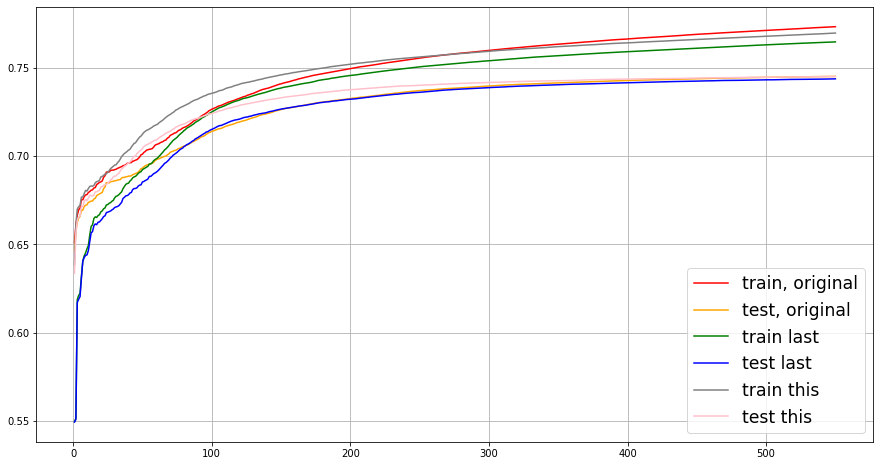

In [262]:
# param1 =  {'booster': 'gbtree',
#          'objective': 'binary:logistic',
#          'eval_metric': 'auc',
#          'max_depth': 3,
#          'lambda': 1,
#          'gamma': 0,
#          'subsample': 1,
#          'colsample_bytree': 1,
#          'colsample_bylevel': 1,
#          'colsample_bynode': 1,
#          'min_child_weight': 1,
#          'eta': 0.3,
#          'seed': 0,
#          'silent': 1,
#          'n_fold': 5,
#          'scale_pos_weight':1}
param1 = {'booster': 'gbtree',
         'objective': 'binary:logistic',
         'eval_metric': 'auc',
         'max_depth': 4,
         'lambda': 100,
         'gamma': 0.2,
         'subsample': 0.75,
         'colsample_bytree': 0.5,
         'colsample_bylevel': 1,
         'colsample_bynode': 1,
         'min_child_weight': 1,
         'eta': 0.02,
         'seed': 0,
         'silent': 1,
         'n_fold': 5,
         'scale_pos_weight':1}
num_round = 550

time0 = time()
cvResult = xgb.cv(param1, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))
fig, ax = plt.subplots(1,figsize=(15,8))
ax.grid()
ax.plot(range(1,(num_round+1)), cvResult.iloc[:,0], c='r', label='train, original')
ax.plot(range(1,(num_round+1)), cvResult.iloc[:,2], c='orange', label='test, original')

param2 =  {'booster': 'gbtree',
         'objective': 'binary:logistic',
         'eval_metric': 'auc',
         'max_depth': 3,
         'lambda': 200,
         'gamma': 0.15,
         'subsample': 0.75,
         'colsample_bytree': 1,
         'colsample_bylevel': 1,
         'colsample_bynode': 1,
         'min_child_weight': 1,
         'eta': 0.03,
         'seed': 0,
         'silent': 1,
         'n_fold': 5,
         'scale_pos_weight':1}
param3 =  {'booster': 'gbtree',
         'objective': 'binary:logistic',
         'eval_metric': 'auc',
         'max_depth': 3,
         'lambda': 80,
         'gamma': 0.15,
         'subsample': 0.75,
         'colsample_bytree': 0.75,
         'colsample_bylevel': 0.5,
         'colsample_bynode': 1,
         'min_child_weight': 30,
         'eta': 0.04,
         'seed': 0,
         'silent': 1,
         'n_fold': 5,
         'scale_pos_weight':1}
time0 = time()
cvResult2 = xgb.cv(param2, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

time0 = time()
cvResult3 = xgb.cv(param3, dfull, num_round)
print(datetime.datetime.fromtimestamp(time()-time0).strftime("%M:%S:%f"))

ax.plot(range(1,(num_round+1)), cvResult2.iloc[:,0], c='green', label='train last')
ax.plot(range(1,(num_round+1)), cvResult2.iloc[:,2], c='blue', label='test last')


ax.plot(range(1,(num_round+1)), cvResult3.iloc[:,0], c='grey', label='train this')
ax.plot(range(1,(num_round+1)), cvResult3.iloc[:,2], c='pink', label='test this')
ax.legend(fontsize='xx-large')
# plt.yticks([0.7,0.75,0.8])
plt.show()

In [263]:
params = {'booster': 'gbtree',
         'objective': 'binary:logistic',
         'eval_metric': 'auc',
         'max_depth': 3,
         'lambda': 200,
         'gamma': 0.15,
         'subsample': 0.75,
         'colsample_bytree': 1,
         'colsample_bylevel': 1,
         'colsample_bynode': 1,
         'min_child_weight': 1,
         'eta': 0.03,
         'seed': 0,
         'silent': 1,
         'n_fold': 5,
         'scale_pos_weight':1}

num_round = 500

In [264]:
bst = xgb.train(params, dfull, num_round)

In [265]:
import joblib

joblib.dump(bst, './b/xgboost-fintech-joblib_5.dat')

['./b/xgboost-fintech-joblib_5.dat']

In [266]:
loaded_model_joblib = joblib.load('./b/xgboost-fintech-joblib_5.dat')
preds = loaded_model_joblib.predict(dtest)

auc(Ytest, preds)

0.7641393493522427

In [267]:
data_test_ = test_data_.copy()

In [268]:
test_data_feature = data_test_.drop(['id'], axis=1)
user_id = data_test_['id']
test_data_feature.shape

(4000, 61)

In [269]:
dtest_a = xgb.DMatrix(test_data_feature)

In [270]:
data_test_['preds'] = loaded_model_joblib.predict(dtest_a)

In [271]:
output_a = data_test_.loc[:,['id', 'preds']]

In [272]:
output_a.to_csv('./b/submit_b_5.txt', sep='\t',header=None, index=False, encoding='utf8')

In [273]:
from xgboost import plot_importance

<Figure size 1440x7200 with 0 Axes>

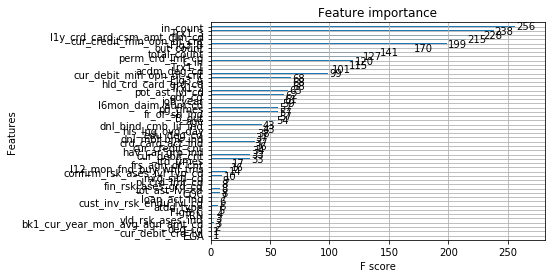

In [274]:
fig = plt.figure(figsize=(20, 100))
plot_importance(loaded_model_joblib)
plt.show()

In [275]:
X.shape

(39923, 61)